In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder


In [2]:
data = pd.read_csv('housedata/data.csv')

In [3]:
categorical = data.columns[data.dtypes == object]
categorical

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [4]:
cont = data.columns[data.dtypes != object]
cont

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

TASK 2
2.1
Continuous variables: bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement
rest are categorical

In [5]:
# keeping only price >0
data_new = data.loc[data['price'] > 0]

data_new['price'].isnull().sum()
# no null values

0

Task 2.2

yr_renovated variable sometimes has 0 as value which means the data was either missing or that the house wasn't renovated.


sqft_living column is right skewed which means there are few houses with very large sqft_living value. Similar is the case for sqft_above column.

Most houses have 3 or 4 bedrooms and very few houses have a waterfront

It will be interesting to see how these variables affect the housing prices

sales prices and yr_renovated columns require treatment



In [6]:
#Task 2.2
# We are removing abnormally high values (>1M)
#Task 2.4
#here the dataset is y: price, rest are X (non zero)
#X values


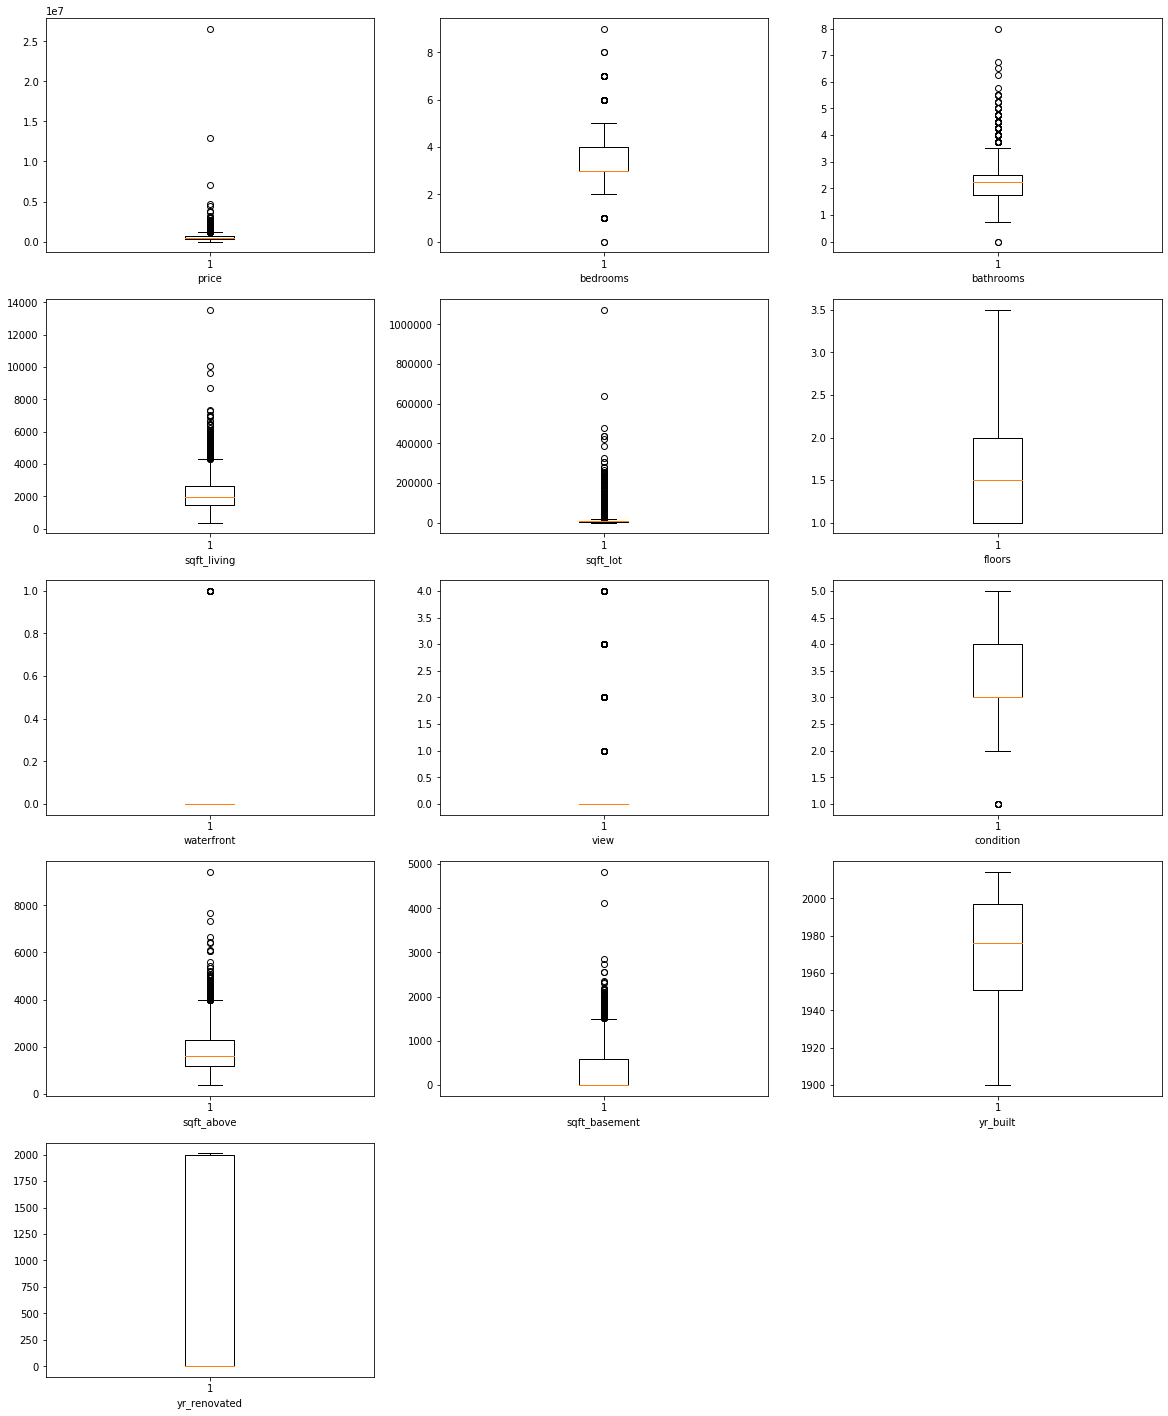

In [6]:
# univariate of continuous var

# univariate analysis of continuous variables
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5,3, figsize=(20, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax1 = axes[i][j]

        # Plot when we have data
        if counter < len(cont):
            ax1.boxplot(data_new[cont[counter]])
            ax1.set_xlabel(cont[counter])
            
        else:
            ax1.set_axis_off()
            
        counter += 1

plt.show()

Following are the scatterplots. Two outlisers were removed for better visualization and  interpretation of the distribution of data values

In [9]:
type(data_new[cont[10]])

pandas.core.series.Series

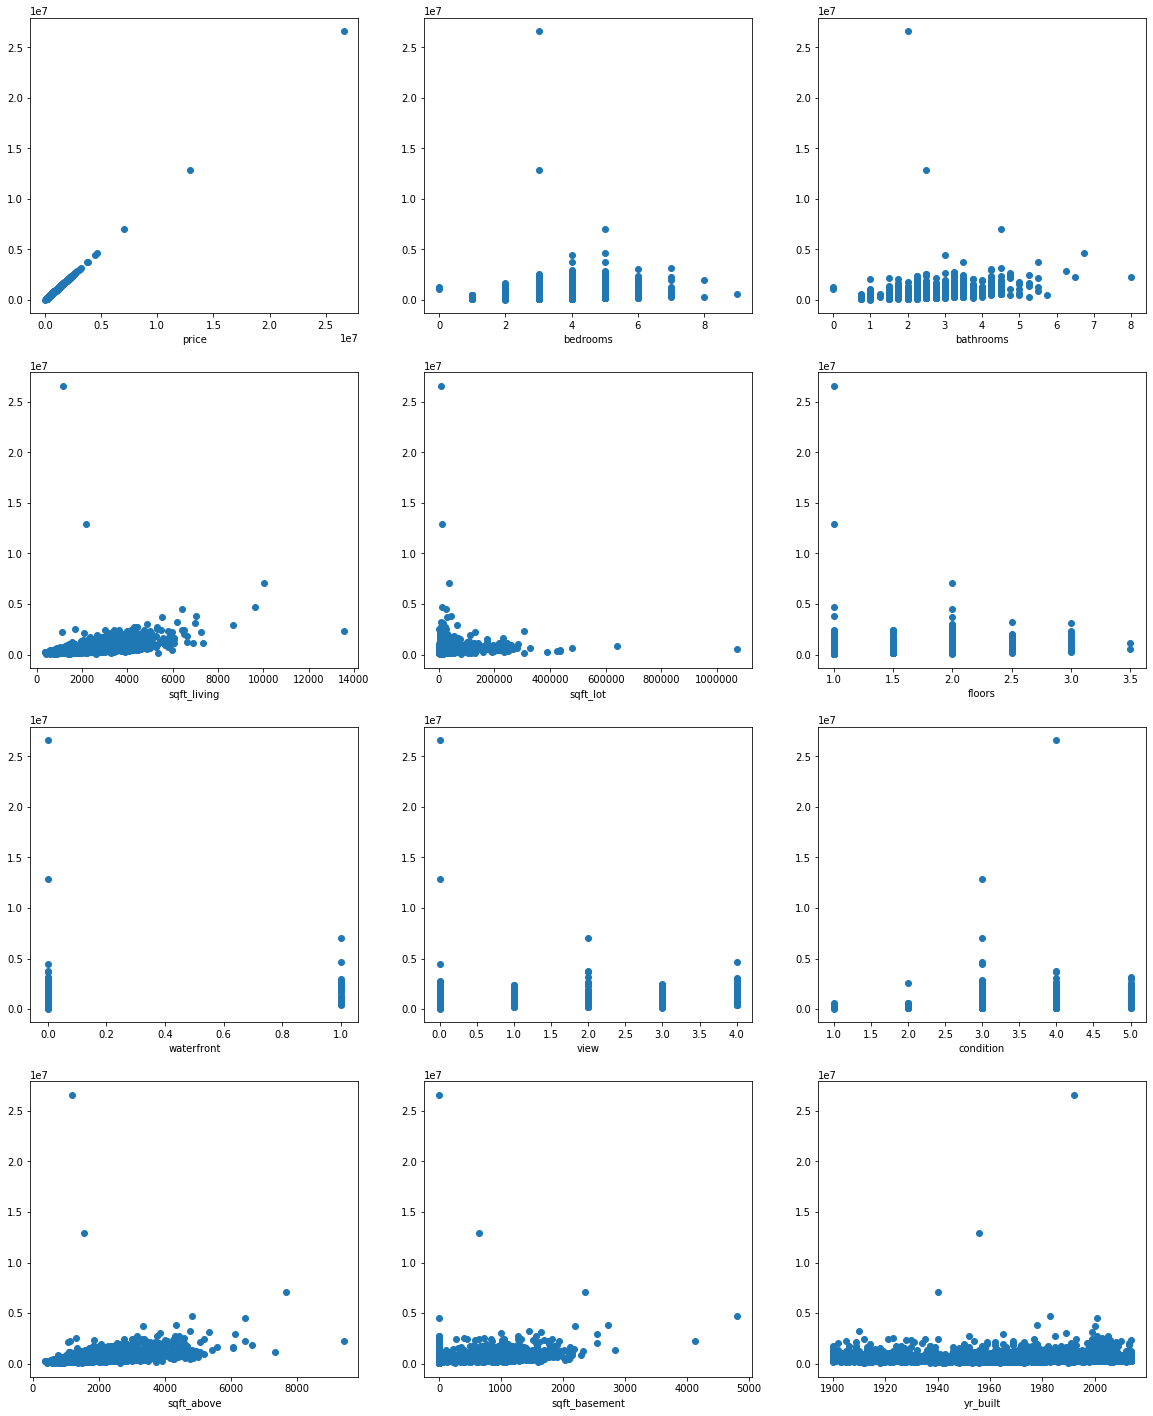

In [8]:
#Task 2.3
# univariate analysis of continuous variables
# import matplotlib.pyplot as plt
# cont = cont.drop('price')

fig, axes = plt.subplots(4,3, figsize=(20, 25))

counter = 0
for i in range(4):
    for j in range(3):

        ax1 = axes[i][j]

        # Plot of the data
        if counter < len(cont):
            ax1.scatter(data_new[cont[counter]], data_new['price'])
            ax1.set_xlabel(cont[counter])
            
        else:
            ax1.set_axis_off()
            
        counter += 1

plt.show()

Linear Regression: (NA)
Lasso: The default score given as output here is the R^2 value. For Lasso, with scaling, score becomes worse (lessens)
Ridge: With scaling, scores reduces further
Elastic Net: With scaling, score becomes better

In [9]:
#Task 2.4

data_new = data.loc[data['price'] > 0]
X = data_new.drop(['date', 'price','street','country'], axis=1)
#y values
y = data_new[['price']]

#split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [10]:
#without scaling, linear regression
categorical = X_train.dtypes == object
preprocess = make_column_transformer((SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(TargetEncoder(), ['statezip']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']), remainder = 'passthrough')
model_lr = make_pipeline(preprocess,LinearRegression())
scores_lr = cross_val_score(model_lr, X_train, y_train)
np.mean(scores_lr)

0.477535596679575

In [11]:
#without scaling, ridge
categorical = X_train.dtypes == object
preprocess = make_column_transformer((SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(TargetEncoder(), ['statezip']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']), remainder = 'passthrough')
model_ridge = make_pipeline(preprocess,Ridge())
scores_ridge = cross_val_score(model_ridge, X_train, y_train)
np.mean(scores_ridge)

0.48037355370280305

In [12]:
#without scaling, lasso
model_lasso = make_pipeline(preprocess,Lasso(tol = 1))
scores_lasso = cross_val_score(model_lasso, X_train, y_train)
np.mean(scores_lasso)

0.43988523277198566

In [13]:
#without scaling, elastic model
model_elastic = make_pipeline(preprocess,ElasticNet(tol = 0.5))
scores_elastic = cross_val_score(model_elastic, X_train, y_train)
np.mean(scores_elastic)

0.47027440138319837

In [14]:
#with scaling
#Linear Regression
preprocess = make_column_transformer((StandardScaler(), ~categorical),(SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')
model_lr_s = make_pipeline(preprocess,LinearRegression())
scores_lr_s = cross_val_score(model_lr_s, X_train, y_train)
np.mean(scores_lr_s)


0.4773881549948463

In [15]:
#with scaling
#Ridge Regression
preprocess = make_column_transformer((StandardScaler(), ~categorical),(SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')
model_ridge_s = make_pipeline(preprocess,Ridge())
scores_ridge_s = cross_val_score(model_ridge_s, X_train, y_train)
np.mean(scores_ridge_s)


0.4797427210993771

In [16]:
#with scaling
#Lasso
preprocess = make_column_transformer((StandardScaler(), ~categorical),(SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')
model_lasso_s = make_pipeline(preprocess,Lasso(tol = 1))
scores_lasso_s = cross_val_score(model_lasso_s, X_train, y_train)
np.mean(scores_lasso_s)


0.4485968139323907

In [17]:
#with scaling
#Elastic Net
preprocess = make_column_transformer((StandardScaler(), ~categorical),(SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')
model_elastic_s = make_pipeline(preprocess,ElasticNet(tol = 0.5))
scores_elastic_s = cross_val_score(model_elastic_s, X_train, y_train)
np.mean(scores_elastic_s)


0.47242276293923746

Elastic Net: Score increases with GridSearchV
Ridge REgression: Score increases with GridSearchV
Lasso: Score increases with GridSearchV

In [18]:
#Task 2.5
#GridSearchCV for Ridge Regression
#no scaling worked better
#R-squared = higher the better 
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')

model = make_pipeline(preprocess, Ridge())
param_grid={'ridge__alpha':np.arange(1, 50, 5)}
grid_ridge1 = GridSearchCV(model,param_grid = param_grid,return_train_score=True)
grid_ridge1.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_ridge1.best_params_)
print("Score :",grid_ridge1.best_score_)

tuned hyperparameters :(best parameters)  {'ridge__alpha': 11}
Score : 0.4844415008892831


In [19]:
#Task 2.5
#GridSearchCV for Lasso
#no scaling worked better
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')

model = make_pipeline(preprocess, Lasso(tol = 0.5))
param_grid={'lasso__alpha':np.arange(1, 50, 5)}
grid_lasso1 = GridSearchCV(model,param_grid = param_grid,return_train_score=True)
grid_lasso1.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_lasso1.best_params_)
print("Score :",grid_lasso1.best_score_)

tuned hyperparameters :(best parameters)  {'lasso__alpha': 46}
Score : 0.46442432974367226


In [20]:
#Task 2.5
#GridSearchCV for ElasticNet
#scaling worked better
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),(SimpleImputer(missing_values = 0, strategy = 'median'),['yr_renovated']),(OneHotEncoder(handle_unknown = 'ignore',sparse = False), ['city']),(TargetEncoder(), ['statezip']), remainder = 'passthrough')

model = make_pipeline(preprocess, ElasticNet(tol = 0.5))
param_grid={'elasticnet__alpha':np.arange(0.1,5,0.2)}
grid_elastic1 = GridSearchCV(model,param_grid = param_grid,return_train_score=True)
grid_elastic1.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_elastic1.best_params_)
print("Score :",grid_elastic1.best_score_)

tuned hyperparameters :(best parameters)  {'elasticnet__alpha': 0.30000000000000004}
Score : 0.4836552714769738


In [21]:
#extracting the mean test scores from lasso, ridge and elastic net
lasso_values = grid_lasso1.cv_results_['mean_test_score']
ridge_values = grid_ridge1.cv_results_['mean_test_score']
elastic_values = grid_elastic1.cv_results_['mean_test_score']

#extracting lasso parameters
lasso_params = []
k = grid_lasso1.cv_results_['params']
for d in k:
    lasso_params.append(d['lasso__alpha'])

#extracting ridge parameters
ridge_params = []
l = grid_ridge1.cv_results_['params']
for d in l:
    ridge_params.append(d['ridge__alpha'])

#extracting elastic parameters
elastic_params = []
l = grid_elastic1.cv_results_['params']
for d in l:
    elastic_params.append(d['elasticnet__alpha'])

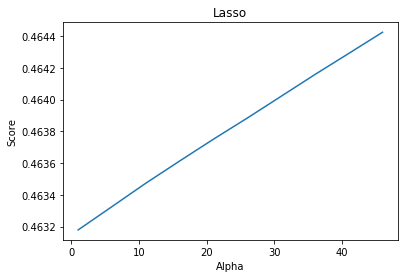

In [22]:
plt.plot(lasso_params, lasso_values)
plt.title('Lasso')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

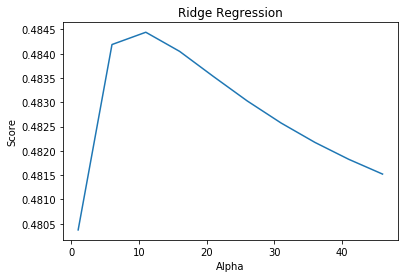

In [23]:
plt.plot(ridge_params, ridge_values)
plt.title('Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

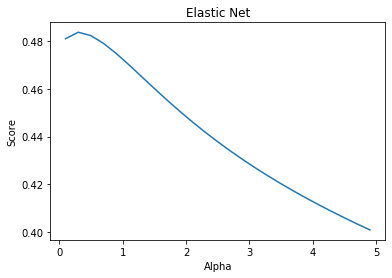

In [24]:
plt.plot(elastic_params, elastic_values)
plt.title('Elastic Net')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

In [25]:
#plotting test results on best model
print("test-set score: {:.3f}".format(grid_ridge1.score(X_test, y_test)))

test-set score: 0.712


In [26]:
#One hot encoding 
X_train_OHC = pd.get_dummies(X_train)
X_test_OHC = pd.get_dummies(X_test)
# X_val_OHC = pd.get_dummies(X_val)

Since pipeline does not change the position of columns, we can infer continous features' locations directy through a mapping between columns_list defined as cols here and the numeric values obtained as score from Gridsearch. I have listed out all columns here in order to obtain the same order, the pipeline transforms result into. After creating a mapping between the score array and the columns, we can visualize the values on a graph as follows. The score values are sorted according to their absolute values. The three graphs do not have identical output.

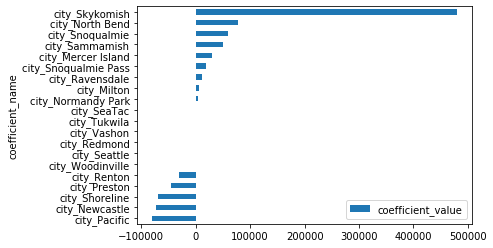

In [27]:
#Task 2.6
#1 Ridge

cols=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated','statezip','avg_price_zip','city_Algona', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
       'city_Vashon', 'city_Woodinville', 'city_Yarrow Point']

val = grid_ridge1.best_estimator_.named_steps['ridge'].coef_
mapping = dict(zip(val[0], cols))
# mapping
sorted_coef = np.absolute(val).sort()
alist = val[0][::-1]

plot_values = pd.DataFrame(columns=['coefficient_name','coefficient_value'])
for i in range(20):
    new_row = {'coefficient_name':mapping[alist[i]], 'coefficient_value':alist[i]}
    plot_values = plot_values.append(new_row,ignore_index=True )
plot_values = plot_values.sort_values('coefficient_value') #just to visualize with highest on top
ax = plot_values.plot.barh(x='coefficient_name', y='coefficient_value')

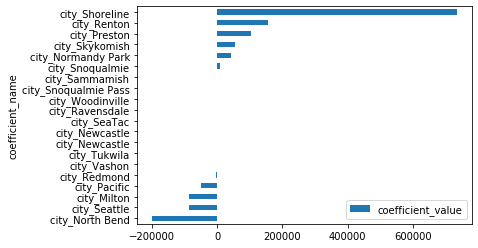

In [28]:
#Task 2.6
#2 Lasso

val = grid_lasso1.best_estimator_.named_steps['lasso'].coef_
mapping = dict(zip(val, cols))
# mapping
sorted_coef = np.absolute(val).sort()
alist = val[::-1]

plot_values = pd.DataFrame(columns=['coefficient_name','coefficient_value'])
for i in range(20):
    new_row = {'coefficient_name':mapping[alist[i]], 'coefficient_value':alist[i]}
    plot_values = plot_values.append(new_row,ignore_index=True )
plot_values = plot_values.sort_values('coefficient_value') #just to visualize with highest on top
ax = plot_values.plot.barh(x='coefficient_name', y='coefficient_value')

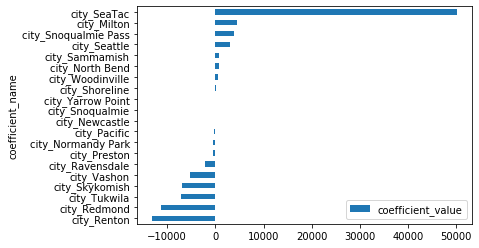

In [29]:
#Task 2.6
#3 Elastic Net

val = grid_elastic1.best_estimator_.named_steps['elasticnet'].coef_
mapping = dict(zip(val, cols))
# mapping
sorted_coef = np.absolute(val).sort()
alist = val[::-1]

plot_values = pd.DataFrame(columns=['coefficient_name','coefficient_value'])
for i in range(20):
    new_row = {'coefficient_name':mapping[alist[i]], 'coefficient_value':alist[i]}
    plot_values = plot_values.append(new_row,ignore_index=True )
plot_values = plot_values.sort_values('coefficient_value') #just to visualize with highest on top
ax = plot_values.plot.barh(x='coefficient_name', y='coefficient_value')

In [6]:
import numpy as np

a = np.array([1,2])
b = np.array((2,3,4))
np.hstack((a,b))


array([1, 2, 2, 3, 4])